# **Optimización De Funciones**
--------------------------------------------------------------------------------

### Importaciones necesarias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact


# ***Métodos***
--------------------------------------------------------------------------------

## **Método de Bisección**
Para calcular Raíces

In [2]:
def biseccion(a, b, error, num_iteraciones):

    f_a = funcion(a)
    f_b = funcion(b)

    if f_a * f_b >= 0:
      raise ValueError("La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].")

    iteracion_data = []
    iteracion=0
    punto_medio = 0
    error_actual=1e6
    inicial=a
    final=b

    while error_actual > error or iteracion < num_iteraciones:

        punto_medio = (a + b) / 2
        error_actual=np.abs((np.abs(b) - np.abs(a)))
        f_a = funcion(a)
        f_b = funcion(b)
        f_punto_medio=funcion(punto_medio)

        iteracion_data.append([iteracion+1, a, b, punto_medio, f_a, f_b, f_punto_medio, error_actual])


        if f_punto_medio * f_a == 0:
            break
        elif f_punto_medio * f_a < 0:
            b = punto_medio
        else:
            a = punto_medio

        iteracion += 1

    print("\n\n--------------RAIZ ENCONTRADA--------------\n", punto_medio)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de Bisección')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axvline(punto_medio, color='black', linewidth=1, linestyle='--') # Línea de la raiz
    plt.plot(punto_medio, 0, 'ro', linewidth=1, label=f"Raíz: X = {round(punto_medio, 2)}")
    plt.ylim(-10, 10)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "Punto medio", "f(a)", "f(b)", "f(Punto medio)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)


## **Método de Interpolación Cuadrática**
Para calcular Máximos

In [36]:
def interpolacion_cuadratica(a, b, c, error, num_iteraciones):

    iteracion_data = []
    iteracion = 0
    maximo = 0
    error_actual = 1e6
    inicial=a
    final=c
    medio=b

    while error_actual > error and iteracion < num_iteraciones:

        #print("-----------Iteracion: ",iteracion+1, "------------")
        f_a = funcion(a)
        #print("f_a",f_a)
        f_b = funcion(b)
        #print("f_b",f_b)
        f_c = funcion(c)
        #print("f_c", f_c)

        # Aplicando la Interpolación cuadrática para el punto medio
        maximo = ((f_a*((b**2)-(c**2))) + (f_b*((c**2)-(a**2))) + (f_c*((a**2)-(b**2)))) / ((2*(f_a*(b-c))) + (2*(f_b*(c-a))) + (2*(f_c*(a-b))))
        #print("minimo", maximo)
        f_maximo = funcion(maximo)
        #print("f_minimo", f_maximo)

        error_actual = np.abs(np.abs(maximo) - np.abs(b))
        iteracion_data.append([iteracion + 1, a, b, c, maximo, f_a, f_b, f_c, f_maximo, error_actual])

        if f_maximo > f_b and maximo > b:
           a=b
           b=maximo

        else:
          c=b
          b=maximo

        iteracion += 1

    print("\n\n--------------MÁXIMO ENCONTRADO--------------\n", maximo)
    print("Con punto inicial ", inicial)
    print("Con punto medio ", medio)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de Interpolación Cuadrática')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_maximo, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.axvline(maximo, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.plot(maximo, f_maximo, 'ro', linewidth=1, label=f"Máximo: X = {round(maximo, 2)}, Y = {round(f_maximo, 2)}")
    plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "c", "Punto medio", "f(a)", "f(b)", "f(c)", "f(Punto medio)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)


## **Método de la Falsa Posición**
Para calcular Raíces

In [4]:
def falsa_posicion(a, b, error, num_iteraciones):

    f_a = funcion(a)
    f_b = funcion(b)

    if f_a * f_b >= 0:
      raise ValueError("La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].")

    iteracion_data = []
    iteracion = 0
    punto_medio = 0
    error_actual = 1e6
    inicial=a
    final=b

    while error_actual > error and iteracion < num_iteraciones:

        f_a = funcion(a)
        f_b = funcion(b)

        # Aplicando la Falsa posicion
        punto_medio = b - (f_b*(a-b))/(f_a-f_b)
        f_punto_medio = funcion(punto_medio)
        error_actual = np.abs(np.abs(b) - np.abs(a))

        iteracion_data.append([iteracion + 1, a, b, punto_medio, f_a, f_b, f_punto_medio, error_actual])

        if f_punto_medio * f_a == 0:
            break
        elif f_punto_medio * f_a < 0:
            b = punto_medio
        else:
            a = punto_medio

        iteracion += 1

    print("\n\n--------------RAIZ ENCONTRADA--------------\n", punto_medio)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de la Falsa Posición')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axvline(punto_medio, color='black', linewidth=1, linestyle='--') # Línea de la raíz
    plt.plot(punto_medio, f_punto_medio, 'ro', linewidth=1, label=f"Raíz: X = {round(punto_medio, 2)}")
    plt.ylim(-10, 10)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "Punto medio", "f(a)", "f(b)", "f(Punto medio)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)


## **Método Búsqueda de la Sección Dorada**

### Para calcular el Máximo

In [5]:
def maximo_seccion_dorada(a, b, error, num_iteraciones):

    constante=0.618
    iteracion_data = []
    iteracion = 0
    punto_medio = 0
    error_actual = 1e6
    inicial=a
    final=b

    while error_actual > error and iteracion < num_iteraciones:

        # Aplicando la sección dorada
        d = constante*(b-a)
        x1=a+d
        x2=b-d

        f_x1 = funcion(x1)
        f_x2 = funcion(x2)
        error_actual = np.abs(np.abs(x2) - np.abs(x1))

        iteracion_data.append([iteracion + 1, a, b, d, x1, x2, f_x1,f_x2, error_actual])

        if f_x1 < f_x2:
           a=a
           b=x1

        else:
          b=b
          a=x2

        iteracion += 1

    # Al hacer la aproximación, tanto el punto "a" como el "b" se acercan al valor máximo. Por lo tanto, se seleccionará el punto "a"
    maximo=a
    f_maximo= funcion(maximo)

    print("\n\n--------------MÁXIMO ENCONTRADO--------------\n", a)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método Búsqueda de la Sección Dorada Máximo')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_maximo, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.axvline(a, color='black', linewidth=1, linestyle='--') # Línea del máximo
    plt.plot(maximo, f_maximo, 'ro', linewidth=1, label=f"Máximo: X = {round(maximo, 2)}, Y = {round(f_maximo, 2)}")
    #plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "d", "X1", "X2", "f(X1)", "f(X2)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)


### Para calcular el Mínimo

In [6]:
def minimo_seccion_dorada(a, b, error, num_iteraciones):

    c_razon_dorada=0.618
    iteracion_data = []
    iteracion = 0
    punto_medio = 0
    error_actual = 1e6
    inicial=a
    final=b

    while error_actual > error and iteracion < num_iteraciones:

        # Aplicando la sección dorada
        d = c_razon_dorada*(b-a)
        x1=a+d
        x2=b-d

        f_x1 = funcion(x1)
        f_x2 = funcion(x2)
        error_actual = np.abs(np.abs(x2) - np.abs(x1))

        iteracion_data.append([iteracion + 1, a, b, d, x1, x2, f_x1,f_x2, error_actual])

        if f_x1 > f_x2:
           a=a
           b=x1

        else:
          b=b
          a=x2

        iteracion += 1

    # Al hacer la aproximación, tanto el punto "a" como el "b" se acercan al valor mínimo. Por lo tanto, se seleccionará el punto "a"
    minimo=a
    f_minimo = funcion(minimo)

    print("\n\n--------------MÍNIMO ENCONTRADO--------------\n", a)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método Búsqueda de la Sección Dorada Mínimo')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_minimo, color='black', linewidth=1, linestyle='--') # Línea del minimo
    plt.axvline(minimo, color='black', linewidth=1, linestyle='--') # Línea del minimo
    plt.plot(minimo, f_minimo, 'ro', linewidth=1, label=f"Mínimo: X = {round(minimo, 2)}, Y = {round(f_minimo, 2)}")
    plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "d", "X1", "X2", "f(X1)", "f(X2)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)


## **Método de Newton - Raphson**

### Para calcular la Raíz

In [7]:
def Newton_Raphson_raiz(a, funcion_str, error, num_iteraciones):

    # Símbolo de variable x para derivar la función en terminos de x
    x = sp.symbols('x')

    # Convertir la cadena de texto en una función
    funcion_original = sp.sympify(funcion_str)

    iteracion_data = []
    iteracion = 0
    error_actual = 1e6
    inicial=a

    while error_actual > error and iteracion < num_iteraciones:
        #print("--------Iteración: ", iteracion+1, "------------")
        #print("Punto inicial: ", a)
        #print("Función: ",funcion_original)

        # Newton - Raphson, para calcular la raiz se usa el criterio de la primera derivada
        d_x=sp.diff(funcion_original, x)
        #print("Su derivada: ",d_x)

        f_x= round(float(funcion_original.subs(x, a)), 5)
        #print("Función evaluada en ", a," es: ",f_x)

        f_d_x=round(float(d_x.subs(x, a)), 5)
        #print("Su derivada evaluada en ", a," es: ",f_d_x)

        b=a-(f_x/f_d_x)
        #print("b=a-(f_x/f_d_x) es: ",b)

        if iteracion > 0:
            error_actual = np.abs((np.abs(b) - np.abs(a))/np.abs(b))

        iteracion_data.append([iteracion + 1, a, f_x, f_d_x, error_actual])

        a=b # El nuevo valor del punto será el siguiente
        iteracion += 1


    # Al hacer la aproximación, el punto "a" es el que se acercan a la raíz.
    raiz=a
    f_raiz=funcion_original.subs(x, a)

    print("\n\n--------------RAÍZ ENCONTRADA--------------\n", a)
    print("Con punto inicial ", inicial)

    # Graficando el resultado
    # Rango de valores X y Y
    grafica_funcion= sp.lambdify(x, funcion_original, 'numpy')
    eje_x = np.linspace(-10, 10, 100)
    eje_y = grafica_funcion(eje_x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de Newton Raphson - Raiz')
    plt.plot(eje_x, eje_y, label=f'Función: Y = {funcion_original}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axvline(raiz, color='black', linewidth=1, linestyle='--') # Línea de la raíz
    plt.plot(raiz, f_raiz, 'ro', linewidth=1, label=f"Raíz= {round(raiz, 2)}")
    plt.ylim(-20, 20)  # Establecer los límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "x", "f(x)", "'f(x)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df


### Para calcular Máximos o Mínimos
El método de Newton - Raphson funciona tanto para máximos, como para mínimos. Dependerá del punto X inicial que se seleccione, ya que se acercará al punto de inflexión de la función que está mas cerca. Estos puntos pueden ser precisamente un máximo o mínimo.

In [8]:
def Newton_Raphson_max_min(a, funcion_str, error, num_iteraciones):

    # Símbolo de variable x para derivar la función en terminos de x
    x = sp.symbols('x')

    # Convertir la cadena de texto en una función
    funcion_original = sp.sympify(funcion_str)

    iteracion_data = []
    iteracion = 0
    error_actual = 1e6
    inicial=a

    while error_actual > error and iteracion < num_iteraciones:

        # Newton - Raphson, para calcular un máximo o mínimo se usa el criterio de la segunda derivada
        d_x=sp.diff(funcion_original, x)
        segunda_dx=sp.diff(d_x, x)

        f_x=round(float(funcion_original.subs(x, a)), 5)
        f_d_x= round(float(d_x.subs(x, a)), 5)
        f_segunda_dx= round(float(segunda_dx.subs(x, a)), 5)

        b=a-(f_d_x/f_segunda_dx)

        if iteracion > 0:
            error_actual = np.abs((np.abs(b) - np.abs(a))/np.abs(b))

        iteracion_data.append([iteracion + 1, a, f_x, f_d_x, f_segunda_dx, error_actual])

        a=b # El nuevo valor del punto será el siguiente
        iteracion += 1

    # Al hacer la aproximación, el punto "a" es el que se acerca al punto de inflexión.
    max_min=a
    f_max_min=funcion_original.subs(x, a)

    print("\n\n--------------MAX-MIN ENCONTRADO--------------\n", a)
    print("Con punto inicial ", inicial)

    # Graficando el resultado
    # Rango de valores X y Y
    grafica_funcion= sp.lambdify(x, funcion_original, 'numpy')
    eje_x = np.linspace(-10, 10, 100)
    eje_y = grafica_funcion(eje_x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método Newton Raphson - MAX-MIN')
    plt.plot(eje_x, eje_y, label=f'Función: Y = {funcion_original}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_max_min, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.axvline(max_min, color='black', linewidth=1, linestyle='--') # Línea del máximo
    plt.plot(max_min, f_max_min, 'ro', linewidth=1, label=f"Max-Min: X = {round(max_min, 2)}, Y = {round(f_max_min, 2)}")
    plt.ylim(-20, 20)  # Establecer los límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "x", "f(x)", "'f(x)", "''f(x)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df


___

## **Ejercicio 1**

In [ ]:
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
x, y = np.meshgrid(x_vals, y_vals)

# Funciones
funcion1str="f(x,y) = x+2*y"
funcion2str="g(x,y) = x**2+4*y**2-2*x+8*y"
funcion1 = x + 2 * y
funcion2 = x**2 + 4 * y**2 - 2 * x + 8 * y
z1 = funcion1
z2 = funcion2


In [ ]:
def plot_surface(angle, elev):

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Gráfico de las funciones')
    ax.set_title('')
    cmap1 = plt.get_cmap('viridis')
    cmap2 = plt.get_cmap('inferno')
    ax.plot([], [], ' ', label=f'Función 1: Y = {funcion1str}')
    ax.plot([], [], ' ', label=f'Función 2: Y = {funcion2str}')

    # Trazar la superficie para la primera función1
    surface1 = ax.plot_surface(x, y, z1, rstride=5, cstride=5, cmap='viridis', edgecolor="black", linewidth=0.2, alpha=0.5)

    # Trazar la superficie para la segunda función2
    surface2 = ax.plot_surface(x, y, z2, rstride=5, cstride=5, cmap='inferno', edgecolor="black", linewidth=0.2, alpha=0.5)

    coords = [(2.58113883008419, -0.209430584957905), (-0.58113883008419, -1.790569415042095)]
    colors = ['red', 'blue']
    i=0

    for coord in coords:
        coord_x, coord_y = coord
        coord_z = coord_x + 2 * coord_y  # Calcula el valor Z
        ax.scatter(coord_x, coord_y, coord_z, color=colors[i], marker='o', s=100, label=f"Coordenada {i+1}: X = {round(coord_x, 2)}, Y = {round(coord_y, 2)}, Z = {round(coord_z, 2)}")
        i=i+1

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.legend(loc='upper left')
    ax.view_init(elev=elev, azim=angle)
    plt.show()

interact(plot_surface, angle=(0, 360, 10), elev=(0, 180, 5))


interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), IntSlider(value=90, descrip…

<function __main__.plot_surface(angle, elev)>

## **Ejercicio 2**

### Falsa posición



--------------RAIZ ENCONTRADA--------------
 5.119974047840259e-05
Con punto inicial  0
Con punto final  5


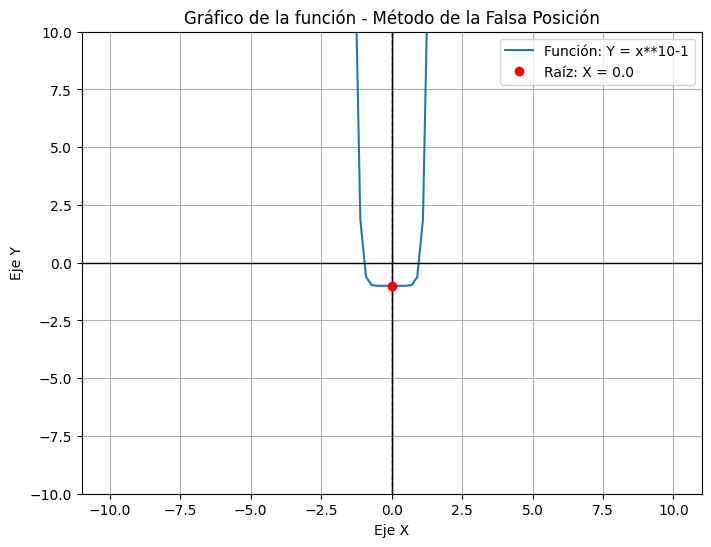

In [9]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**10-1"
a=0
b=5

error = 1e-6
num_iteraciones = 100

try:

    resultados = falsa_posicion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


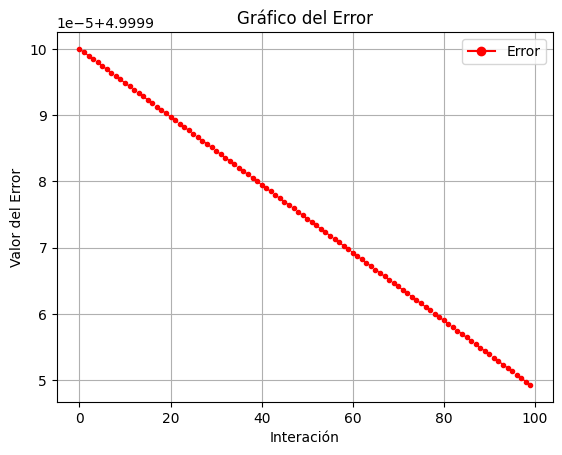

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,0.000000e+00,5,5.120000e-07,-1.0,9765624,-1.0,5.000000
1,2,5.120000e-07,5,1.024000e-06,-1.0,9765624,-1.0,4.999999
2,3,1.024000e-06,5,1.536000e-06,-1.0,9765624,-1.0,4.999999
3,4,1.536000e-06,5,2.048000e-06,-1.0,9765624,-1.0,4.999998
4,5,2.048000e-06,5,2.559999e-06,-1.0,9765624,-1.0,4.999998
...,...,...,...,...,...,...,...,...
95,96,4.863977e-05,5,4.915176e-05,-1.0,9765624,-1.0,4.999951
96,97,4.915176e-05,5,4.966376e-05,-1.0,9765624,-1.0,4.999951
97,98,4.966376e-05,5,5.017575e-05,-1.0,9765624,-1.0,4.999950
98,99,5.017575e-05,5,5.068775e-05,-1.0,9765624,-1.0,4.999950


In [10]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



### Bisección



--------------RAIZ ENCONTRADA--------------
 1.0
Con punto inicial  0
Con punto final  5


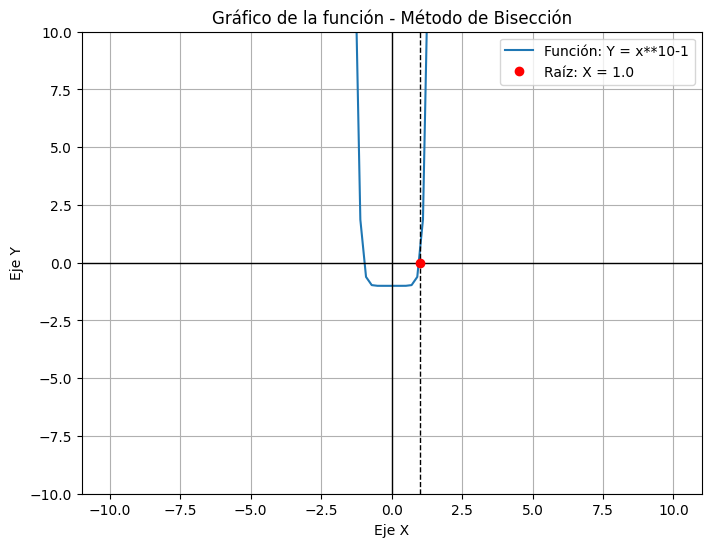

In [11]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2+2*x+10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): : "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**10-1"
a=0
b=5

error = 1e-6
num_iteraciones = 100

try:
    resultados = biseccion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


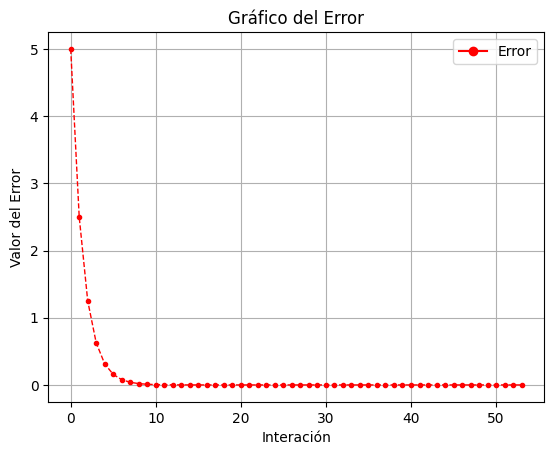

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,0.0000,5.00,2.50000,-1.000000e+00,9.765624e+06,9.535743e+03,5.000000e+00
1,2,0.0000,2.50,1.25000,-1.000000e+00,9.535743e+03,8.313226e+00,2.500000e+00
2,3,0.0000,1.25,0.62500,-1.000000e+00,8.313226e+00,-9.909051e-01,1.250000e+00
3,4,0.6250,1.25,0.93750,-9.909051e-01,8.313226e+00,-4.755395e-01,6.250000e-01
4,5,0.9375,1.25,1.09375,-4.755395e-01,8.313226e+00,1.450082e+00,3.125000e-01
...,...,...,...,...,...,...,...,...
49,50,1.0000,1.00,1.00000,-3.552714e-14,5.329071e-14,8.881784e-15,8.881784e-15
50,51,1.0000,1.00,1.00000,-3.552714e-14,8.881784e-15,-1.332268e-14,4.440892e-15
51,52,1.0000,1.00,1.00000,-1.332268e-14,8.881784e-15,-2.220446e-15,2.220446e-15
52,53,1.0000,1.00,1.00000,-2.220446e-15,8.881784e-15,4.440892e-15,1.110223e-15


In [12]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Newton Rapson



--------------RAÍZ ENCONTRADA--------------
 0.9999995233476702
Con punto inicial  0.8


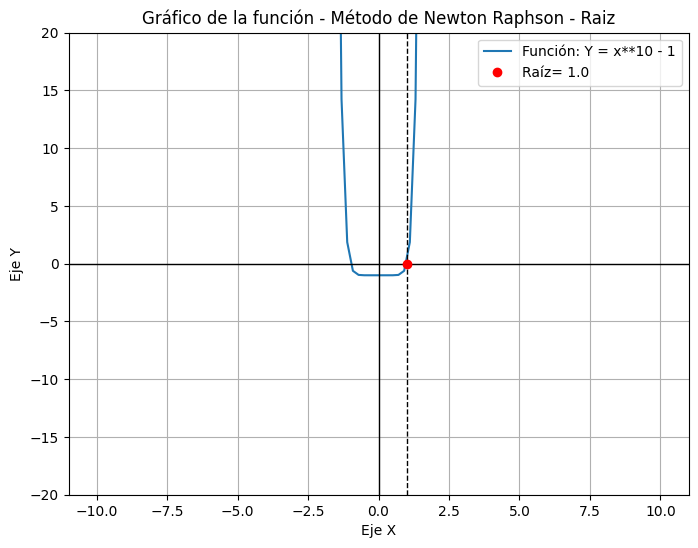

In [31]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**10-1"
a=0.8

error = 1e-6
num_iteraciones = 100

try:

  resultados = Newton_Raphson_raiz(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


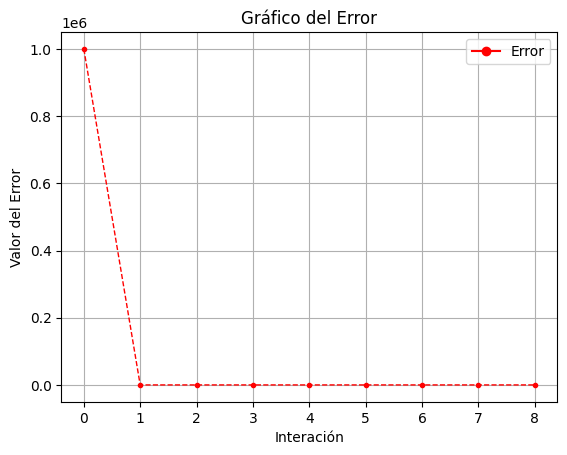

,Iteración,x,f(x),'f(x),Error
0,1.0,0.800000,-0.89263,1.34218,1000000.000000
1,2.0,1.465060,44.55684,310.95550,0.108408
2,3.0,1.321770,15.27639,123.14088,0.103578
3,4.0,1.197714,5.07477,50.71970,0.091153
4,5.0,1.097658,1.53905,23.13154,0.064526
5,6.0,1.031124,0.35865,13.17640,0.027113
6,7.0,1.003905,0.03974,10.35695,0.003837
7,8.0,1.000067,0.00068,10.00608,0.000068
8,9.0,1.000000,-0.00000,9.99996,0.000000


In [32]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



## **Ejercicio 3**

### Interpolación cuadrática



--------------MÁXIMO ENCONTRADO--------------
 0.75
Con punto inicial  1
Con punto medio  2
Con punto final  5


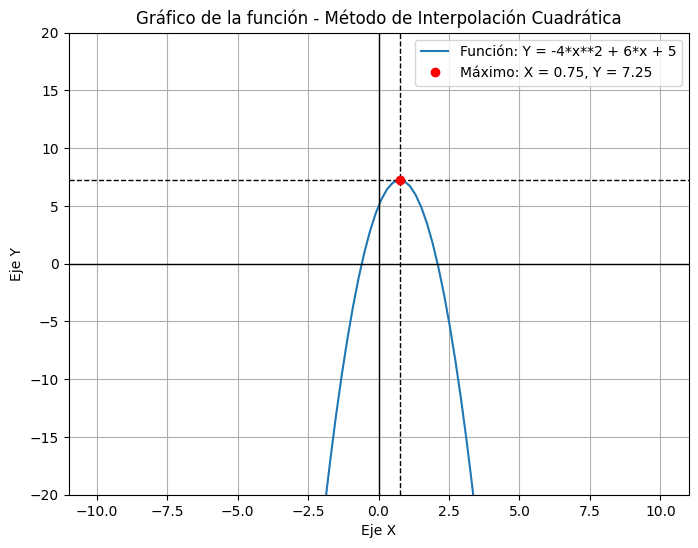

In [37]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto medio 'b': "))
c = float(input("Ingresa el valor del punto final 'c' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "-4*x**2 + 6*x + 5"
a=1
b=2
c=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = interpolacion_cuadratica(a, b, c, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


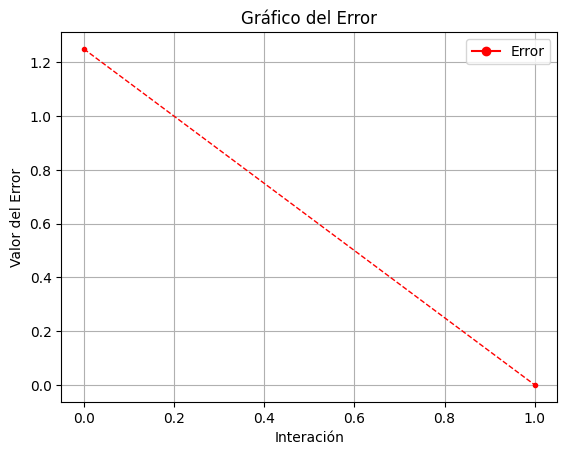

,Iteración,a,b,c,Punto medio,f(a),f(b),f(c),f(Punto medio),Error
0,1,1,2.00,5,0.75,7,1.00,-65,7.25,1.25
1,2,1,0.75,2,0.75,7,7.25,1,7.25,0.00


In [38]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Sección dorada



--------------MÁXIMO ENCONTRADO--------------
 0.7499995924125018
Con punto inicial  0
Con punto final  2


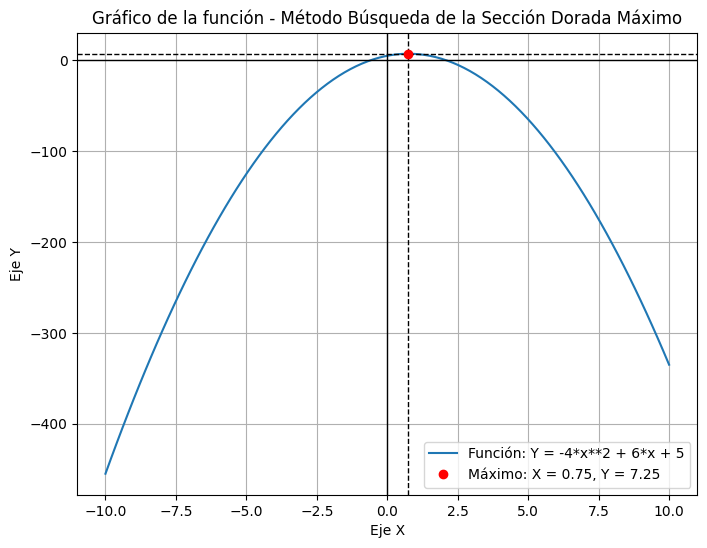

In [19]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "-4*x**2 + 6*x + 5"
a=0
b=2
c=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = maximo_seccion_dorada(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


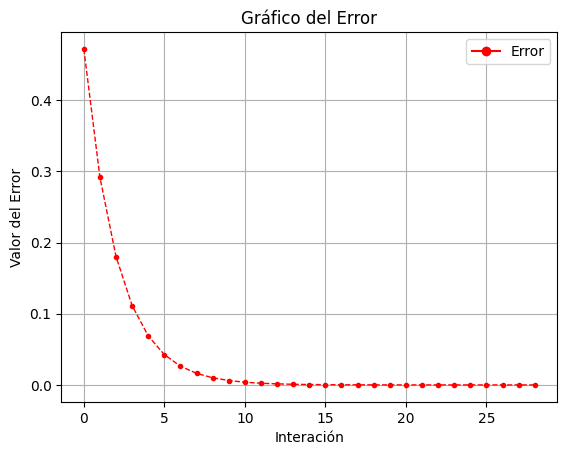

,Iteración,a,b,d,X1,X2,f(X1),f(X2),Error
0,1,0.000000,2.000000,1.236000,1.236000,0.764000,6.305216,7.249216,4.720000e-01
1,2,0.000000,1.236000,0.763848,0.763848,0.472152,7.249233,6.941202,2.916960e-01
2,3,0.472152,1.236000,0.472058,0.944210,0.763942,7.099130,7.249222,1.802681e-01
3,4,0.472152,0.944210,0.291732,0.763884,0.652478,7.249229,7.211958,1.114057e-01
4,5,0.652478,0.944210,0.180290,0.832768,0.763920,7.222598,7.249225,6.884872e-02
...,...,...,...,...,...,...,...,...,...
24,25,0.749989,0.750009,0.000012,0.750001,0.749997,7.250000,7.250000,4.546377e-06
25,26,0.749997,0.750009,0.000007,0.750004,0.750001,7.250000,7.250000,2.809661e-06
26,27,0.749997,0.750004,0.000005,0.750001,0.750000,7.250000,7.250000,1.736370e-06
27,28,0.749997,0.750001,0.000003,0.750000,0.749999,7.250000,7.250000,1.073077e-06


In [20]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Newton - Rapson



--------------MAX-MIN ENCONTRADO--------------
 0.75
Con punto inicial  5


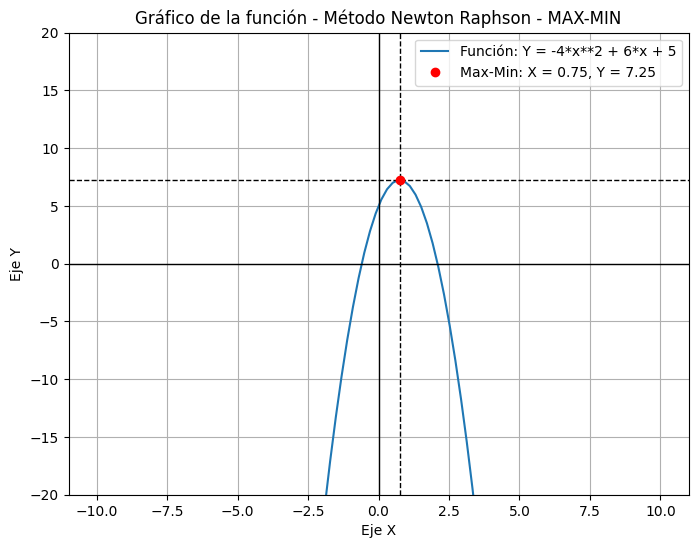

In [33]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "-4*x**2 + 6*x + 5"
a=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = Newton_Raphson_max_min(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


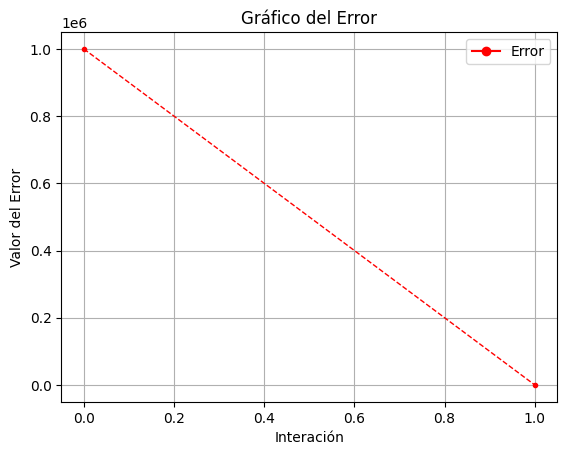

,Iteración,x,f(x),'f(x),''f(x),Error
0,1.0,5.00,-65.00,-34.0,-8.0,1000000.0
1,2.0,0.75,7.25,0.0,-8.0,0.0


In [34]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



## **Ejercicio 4**

### Bisección

In [23]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2+2*x+10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): : "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**3 + 2*x**2 - 4*x + 8"
a=1
b=2

error = 1e-6
num_iteraciones = 100

try:
    resultados = biseccion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


Hubo un error al realizar las operaciones: La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].


#### Segundo intento



--------------RAIZ ENCONTRADA--------------
 -3.678573510428322
Con punto inicial  -5
Con punto final  2


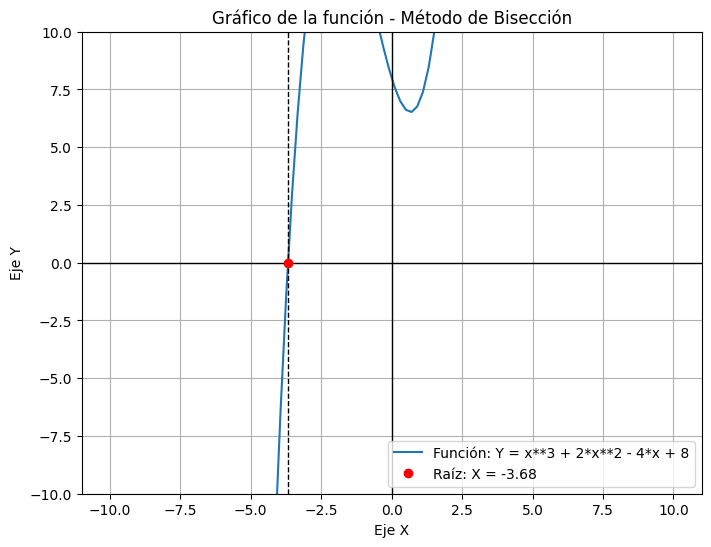

In [24]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2+2*x+10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): : "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**3 + 2*x**2 - 4*x + 8"
a=-5
b=2

error = 1e-6
num_iteraciones = 100

try:
    resultados = biseccion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


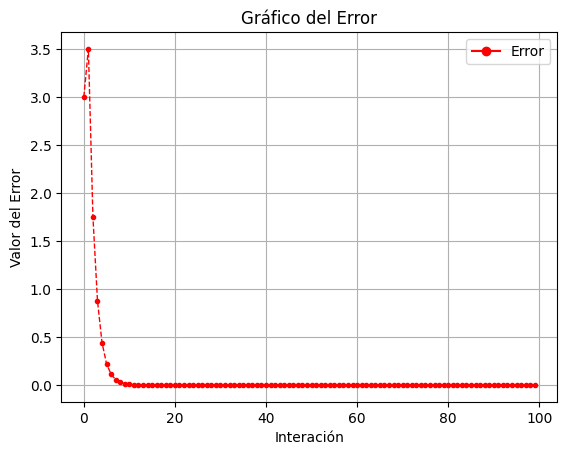

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,-5.000000,2.000000,-1.500000,-4.700000e+01,1.600000e+01,1.512500e+01,3.000000e+00
1,2,-5.000000,-1.500000,-3.250000,-4.700000e+01,1.512500e+01,7.796875e+00,3.500000e+00
2,3,-5.000000,-3.250000,-4.125000,-4.700000e+01,7.796875e+00,-1.165820e+01,1.750000e+00
3,4,-4.125000,-3.250000,-3.687500,-1.165820e+01,7.796875e+00,-1.960449e-01,8.750000e-01
4,5,-3.687500,-3.250000,-3.468750,-1.960449e-01,7.796875e+00,4.202667e+00,4.375000e-01
...,...,...,...,...,...,...,...,...
95,96,-3.678574,-3.678574,-3.678574,-1.776357e-15,1.065814e-14,1.065814e-14,4.440892e-16
96,97,-3.678574,-3.678574,-3.678574,-1.776357e-15,1.065814e-14,1.065814e-14,4.440892e-16
97,98,-3.678574,-3.678574,-3.678574,-1.776357e-15,1.065814e-14,1.065814e-14,4.440892e-16
98,99,-3.678574,-3.678574,-3.678574,-1.776357e-15,1.065814e-14,1.065814e-14,4.440892e-16


In [25]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Falsa Posición

In [26]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**3 + 2*x**2 - 4*x + 8"
a=1
b=2

error = 1e-6
num_iteraciones = 100

try:

    resultados = falsa_posicion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


Hubo un error al realizar las operaciones: La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].


### Segundo intento



--------------RAIZ ENCONTRADA--------------
 -3.6785735104283224
Con punto inicial  -5
Con punto final  2


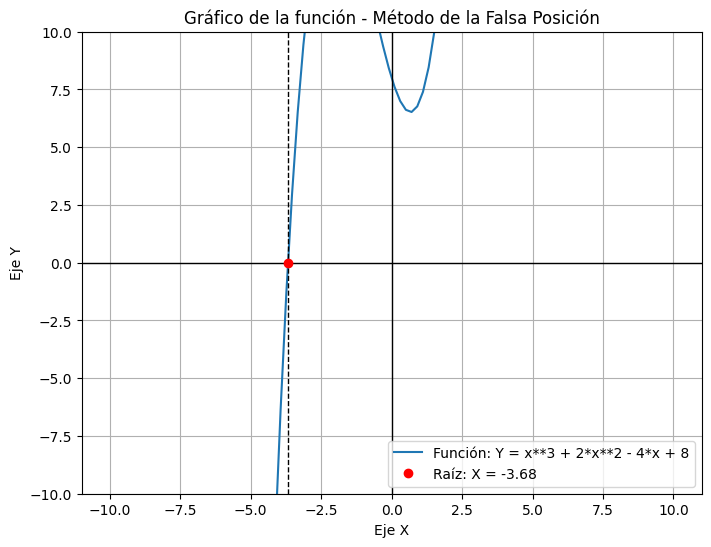

In [27]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**3 + 2*x**2 - 4*x + 8"
a=-5
b=2

error = 1e-6
num_iteraciones = 100

try:

    resultados = falsa_posicion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


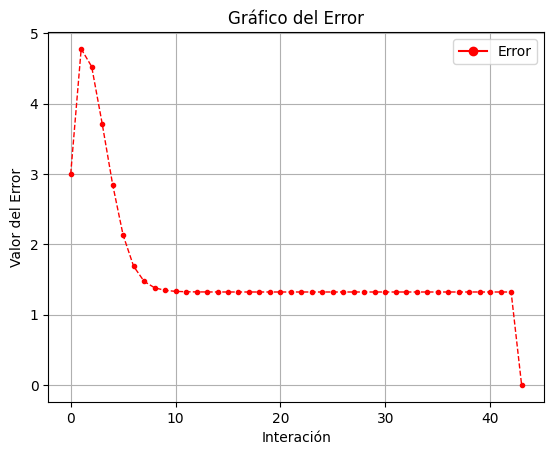

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,-5.000000,2.000000,0.222222,-4.700000e+01,1.600000e+01,7.220850e+00,3.000000e+00
1,2,-5.000000,0.222222,-0.473246,-4.700000e+01,7.220850e+00,1.023492e+01,4.777778e+00
2,3,-5.000000,-0.473246,-1.282734,-4.700000e+01,1.023492e+01,1.431113e+01,4.526754e+00
3,4,-5.000000,-1.282734,-2.150411,-4.700000e+01,1.431113e+01,1.590610e+01,3.717266e+00
4,5,-5.000000,-2.150411,-2.870943,-4.700000e+01,1.590610e+01,1.230519e+01,2.849589e+00
...,...,...,...,...,...,...,...,...
39,40,-5.000000,-3.678574,-3.678574,-4.700000e+01,1.811884e-13,7.283063e-14,1.321426e+00
40,41,-5.000000,-3.678574,-3.678574,-4.700000e+01,7.283063e-14,2.842171e-14,1.321426e+00
41,42,-5.000000,-3.678574,-3.678574,-4.700000e+01,2.842171e-14,1.065814e-14,1.321426e+00
42,43,-5.000000,-3.678574,-3.678574,-4.700000e+01,1.065814e-14,-1.776357e-15,1.321426e+00


In [28]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



### Newton – Raphson



--------------RAÍZ ENCONTRADA--------------
 -3.678573562410392
Con punto inicial  1.2


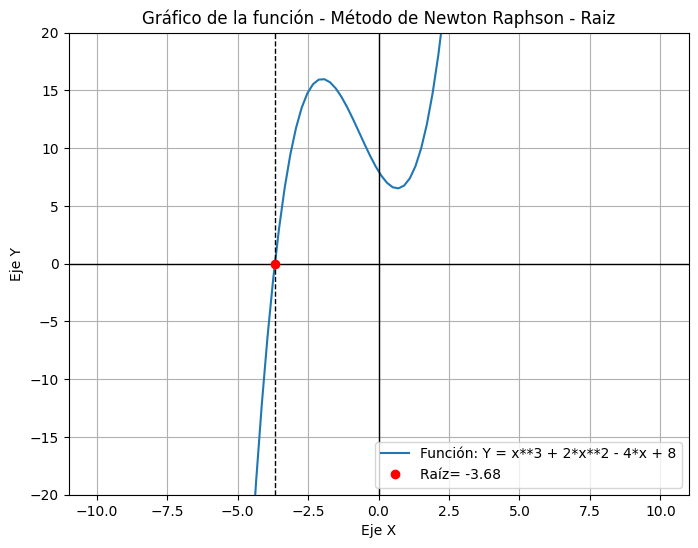

In [29]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="x**3 + 2*x**2 - 4*x + 8"
a=1.2

error = 1e-6
num_iteraciones = 100

try:

  resultados = Newton_Raphson_raiz(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


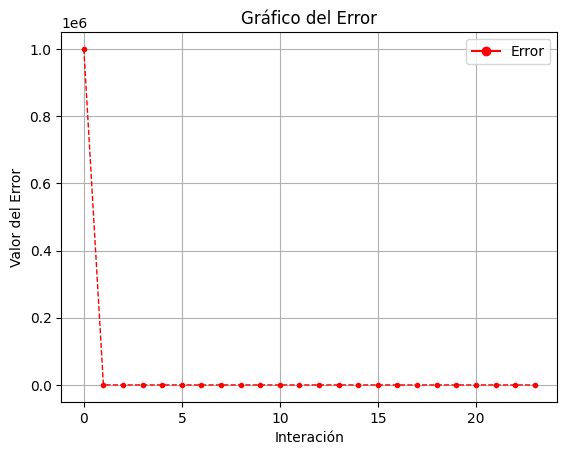

,Iteración,x,f(x),'f(x),Error
0,1.0,1.200000,7.80800,5.12000,1000000.000000
1,2.0,-0.325000,9.47692,-4.98312,0.793887
2,3.0,1.576804,10.58584,9.76616,2.199205
3,4.0,0.492874,6.63409,-1.29973,0.911941
4,5.0,5.597080,223.60773,112.37024,0.551658
...,...,...,...,...,...
19,20.0,-4.275407,-16.49077,33.73568,0.129093
20,21.0,-3.786584,-2.47009,23.86832,0.028098
21,22.0,-3.683096,-0.09914,21.96320,0.001227
22,23.0,-3.678582,-0.00018,21.88156,0.000002


In [30]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



## **Ejercicio 5**

### Bisección



--------------RAIZ ENCONTRADA--------------
 3.0
Con punto inicial  0
Con punto final  5


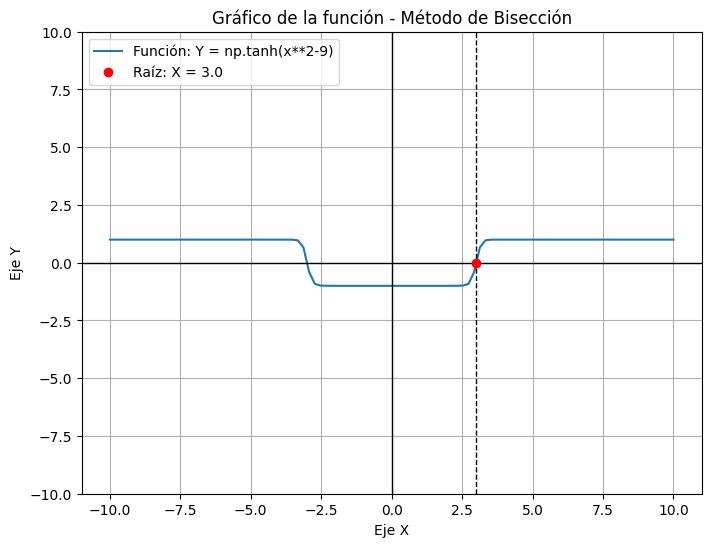

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2+2*x+10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): : "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="np.tanh(x**2-9)"
a=0
b=5

error = 1e-6
num_iteraciones = 100

try:
    resultados = biseccion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


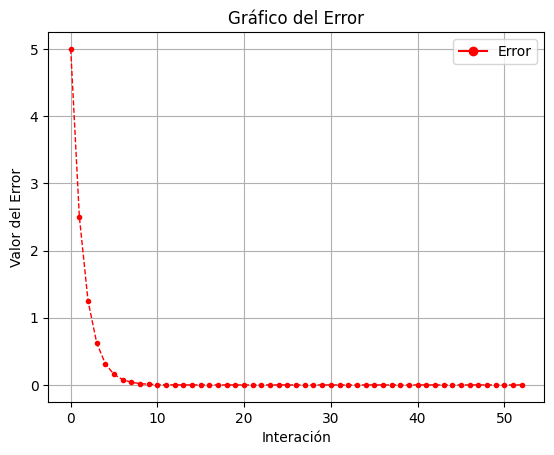

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,0.0000,5.000,2.50000,-1.000000e+00,1.000000e+00,-9.918597e-01,5.000000e+00
1,2,2.5000,5.000,3.75000,-9.918597e-01,1.000000e+00,9.999199e-01,2.500000e+00
2,3,2.5000,3.750,3.12500,-9.918597e-01,9.999199e-01,6.443783e-01,1.250000e+00
3,4,2.5000,3.125,2.81250,-9.918597e-01,6.443783e-01,-7.968211e-01,6.250000e-01
4,5,2.8125,3.125,2.96875,-7.968211e-01,6.443783e-01,-1.843900e-01,3.125000e-01
...,...,...,...,...,...,...,...,...
48,49,3.0000,3.000,3.00000,-6.394885e-14,4.263256e-14,-1.065814e-14,1.776357e-14
49,50,3.0000,3.000,3.00000,-1.065814e-14,4.263256e-14,1.598721e-14,8.881784e-15
50,51,3.0000,3.000,3.00000,-1.065814e-14,1.598721e-14,3.552714e-15,4.440892e-15
51,52,3.0000,3.000,3.00000,-1.065814e-14,3.552714e-15,-5.329071e-15,2.220446e-15


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Falsa Posición



--------------RAIZ ENCONTRADA--------------
 3.0
Con punto inicial  0
Con punto final  5


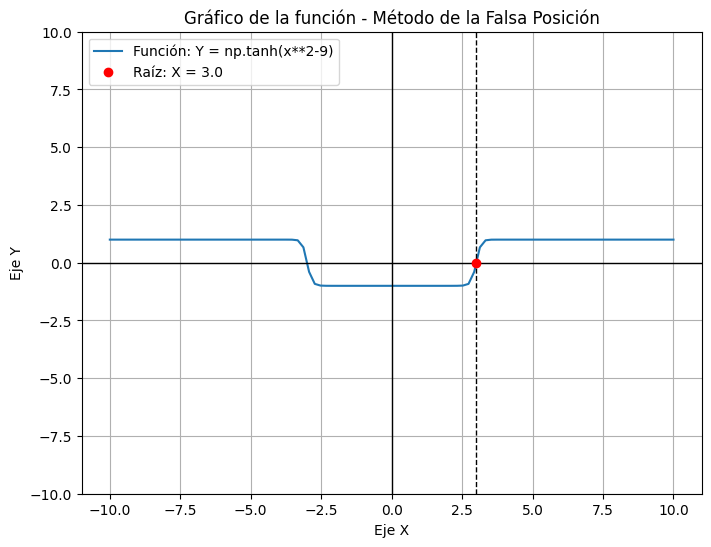

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="np.tanh(x**2-9)"
a=0
b=5


error = 1e-6
num_iteraciones = 1000

try:

    resultados = falsa_posicion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


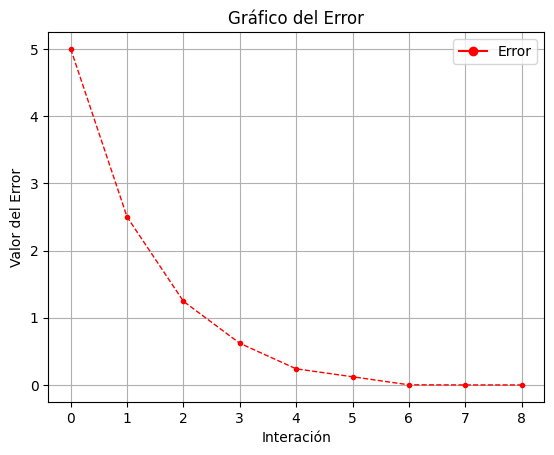

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,0.000000,5.000000,2.500000,-1.000000e+00,1.000000,-9.918597e-01,5.000000
1,2,2.500000,5.000000,3.744892,-9.918597e-01,1.000000,9.999135e-01,2.500000
2,3,2.500000,3.744892,3.119929,-9.918597e-01,0.999913,6.254797e-01,1.244892
3,4,2.500000,3.119929,2.880181,-9.918597e-01,0.625480,-6.072509e-01,0.619929
4,5,2.880181,3.119929,2.998283,-6.072509e-01,0.625480,-1.030139e-02,0.239747
5,6,2.998283,3.119929,3.000254,-1.030139e-02,0.625480,1.521374e-03,0.121646
6,7,2.998283,3.000254,3.000000,-1.030139e-02,0.001521,-4.814507e-07,0.001971
7,8,3.000000,3.000254,3.000000,-4.814507e-07,0.001521,-1.997336e-11,0.000254
8,9,3.000000,3.000254,3.000000,-1.997336e-11,0.001521,0.000000e+00,0.000254


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



 ### Newton – Raphson

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="tanh(x**2-9)"
a=3.2

error = 1e-6
num_iteraciones = 100

try:

  resultados = Newton_Raphson_raiz(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


--------Iteración:  1 ------------
Punto inicial:  3.2
Función:  tanh(x**2 - 9)
Su derivada:  2*x*(1 - tanh(x**2 - 9)**2)
Función evaluada en  3.2  es:  0.84546
Su derivada evaluada en  3.2  es:  1.82531
b=a-(f_x/f_d_x) es:  2.7368129249278206
--------Iteración:  2 ------------
Punto inicial:  2.7368129249278206
Función:  tanh(x**2 - 9)
Su derivada:  2*x*(1 - tanh(x**2 - 9)**2)
Función evaluada en  2.7368129249278206  es:  -0.90691
Su derivada evaluada en  2.7368129249278206  es:  0.97161
b=a-(f_x/f_d_x) es:  3.6702224205073226
--------Iteración:  3 ------------
Punto inicial:  3.6702224205073226
Función:  tanh(x**2 - 9)
Su derivada:  2*x*(1 - tanh(x**2 - 9)**2)
Función evaluada en  3.6702224205073226  es:  0.99974
Su derivada evaluada en  3.6702224205073226  es:  0.00384
b=a-(f_x/f_d_x) es:  -256.67873591282597
--------Iteración:  4 ------------
Punto inicial:  -256.67873591282597
Función:  tanh(x**2 - 9)
Su derivada:  2*x*(1 - tanh(x**2 - 9)**2)
Función evaluada en  -256.678735912825

## **Ejercicio 6**

### Interpolación Cuadrática



--------------MÁXIMO ENCONTRADO--------------
 -0.5866930503181841
Con punto inicial  -2
Con punto medio  -1
Con punto final  1


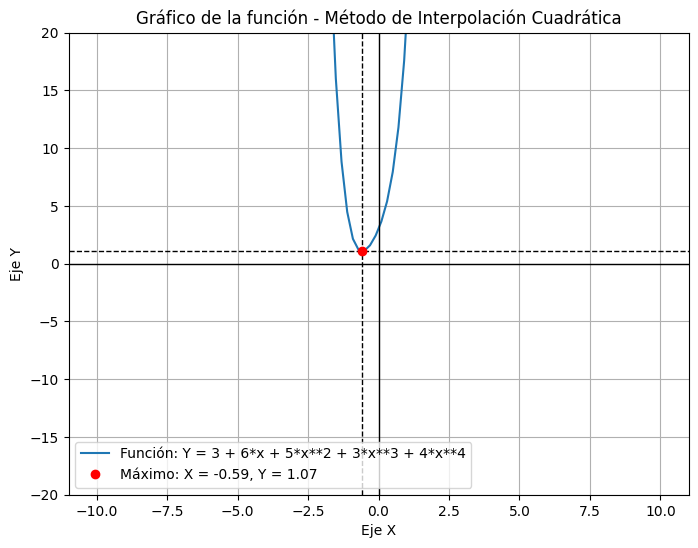

In [39]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto medio 'b': "))
c = float(input("Ingresa el valor del punto final 'c' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "3 + 6*x + 5*x**2 + 3*x**3 + 4*x**4"
a=-2
b=-1
c=1

error = 0.01
num_iteraciones = 100

try:

  resultados = interpolacion_cuadratica(a, b, c, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


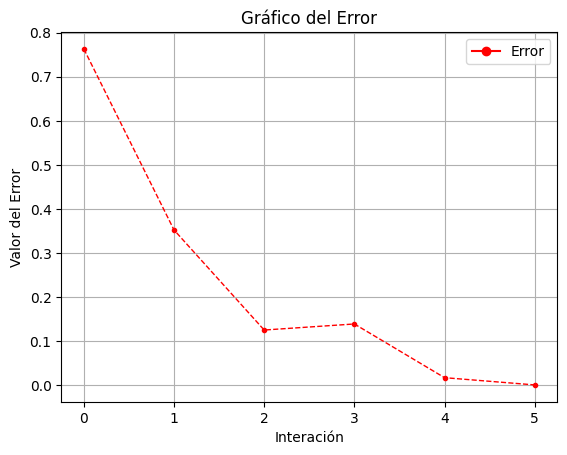

,Iteración,a,b,c,Punto medio,f(a),f(b),f(c),f(Punto medio),Error
0,1,-2.00000,-1.000000,1.000000,-0.236842,51.000000,3.000000,21.000000,1.832148,0.763158
1,2,-2.00000,-0.236842,-1.000000,-0.589390,51.000000,1.832148,3.000000,1.069028,0.352548
2,3,-2.00000,-0.589390,-0.236842,-0.463920,51.000000,1.069028,1.832148,1.178334,0.125470
3,4,-0.58939,-0.463920,-0.236842,-0.603128,1.069028,1.178334,1.832148,1.071156,0.139208
4,5,-0.58939,-0.603128,-0.463920,-0.585749,1.069028,1.071156,1.178334,1.068976,0.017379
5,6,-0.58939,-0.585749,-0.603128,-0.586693,1.069028,1.068976,1.071156,1.068969,0.000944


In [40]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Sección Dorada



--------------MÍNIMO ENCONTRADO--------------
 -0.5986981095777572
Con punto inicial  -2
Con punto final  1


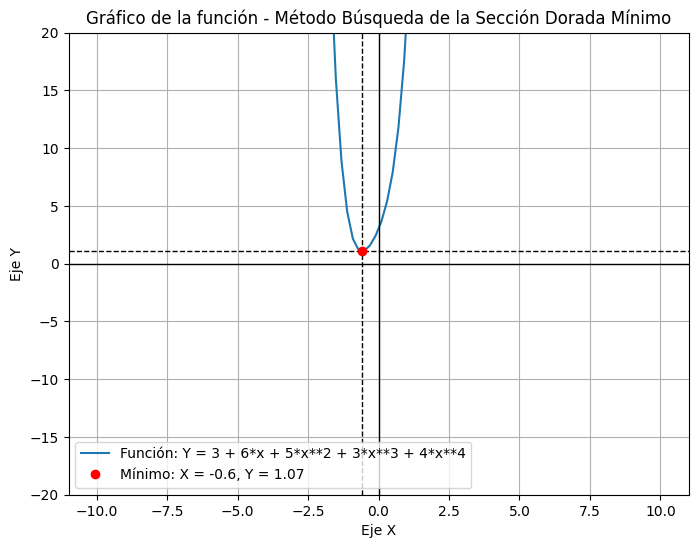

In [41]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "3 + 6*x + 5*x**2 + 3*x**3 + 4*x**4"
a=-2
b=1

error = 0.01
num_iteraciones = 100

try:

  resultados = minimo_seccion_dorada(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


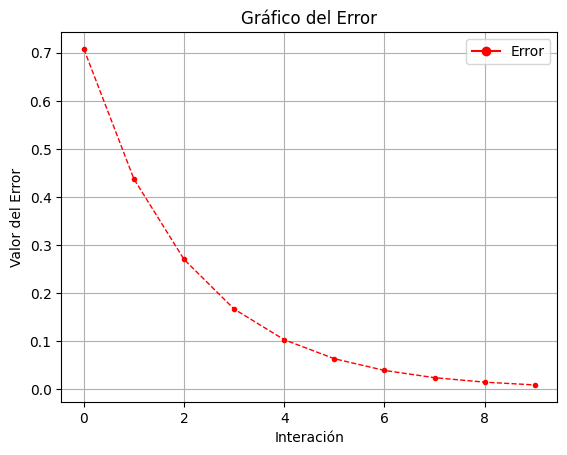

,Iteración,a,b,d,X1,X2,f(X1),f(X2),Error
0,1,-2.000000,1.000000,1.854000,-0.146000,-0.854000,2.223061,1.781680,0.708000
1,2,-2.000000,-0.146000,1.145772,-0.854228,-1.291772,1.783035,8.264004,0.437544
2,3,-1.291772,-0.146000,0.708087,-0.583685,-0.854087,1.069041,1.782197,0.270402
3,4,-0.854087,-0.146000,0.437598,-0.416489,-0.583598,1.272002,1.069045,0.167109
4,5,-0.854087,-0.416489,0.270435,-0.583652,-0.686925,1.069042,1.156000,0.103273
5,6,-0.686925,-0.416489,0.167129,-0.519796,-0.583618,1.102842,1.069044,0.063823
6,7,-0.686925,-0.519796,0.103286,-0.583639,-0.623081,1.069043,1.079858,0.039442
7,8,-0.623081,-0.519796,0.063831,-0.559251,-0.583626,1.074845,1.069044,0.024375
8,9,-0.623081,-0.559251,0.039447,-0.583634,-0.598698,1.069043,1.070133,0.015064
9,10,-0.598698,-0.559251,0.024378,-0.574320,-0.583629,1.070177,1.069044,0.009310


In [42]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Newton – Raphson



--------------MAX-MIN ENCONTRADO--------------
 -0.5866825923565698
Con punto inicial  -1


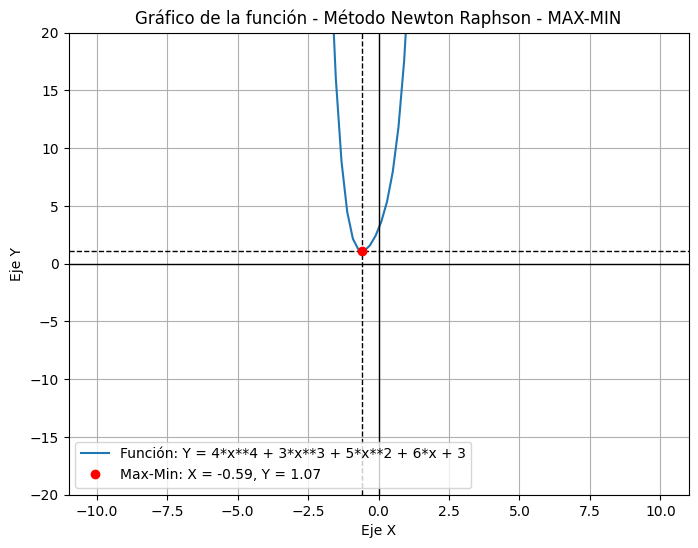

In [50]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "3 + 6*x + 5*x**2 + 3*x**3 + 4*x**4"
a=-1

error = 0.01
num_iteraciones = 100

try:

  resultados = Newton_Raphson_max_min(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


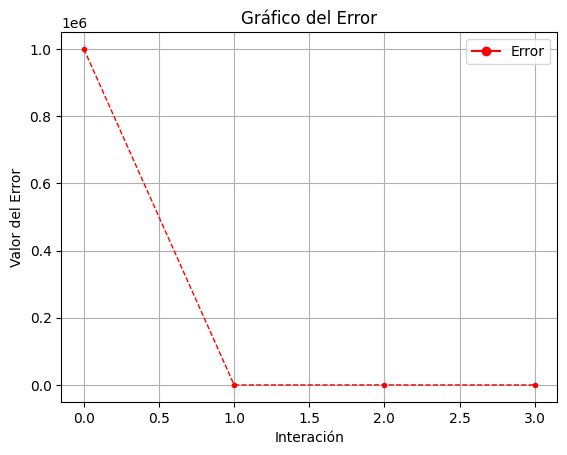

,Iteración,x,f(x),'f(x),''f(x),Error
0,1.0,-1.000000,3.00000,-11.00000,40.00000,1000000.000000
1,2.0,-0.725000,1.24002,-2.61662,22.18000,0.194344
2,3.0,-0.607028,1.07233,-0.33280,16.76068,0.033816
3,4.0,-0.587172,1.06897,-0.00782,15.97991,0.000834


In [51]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



### Bisección

In [46]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2+2*x+10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): : "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "3 + 6*x + 5*x**2 + 3*x**3 + 4*x**4"
a=-2
b=1

error = 0.01
num_iteraciones = 100

try:
    resultados = biseccion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


Hubo un error al realizar las operaciones: La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].


## **Ejercicio 7**

### Interpolación Cuadrática

In [ ]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto medio 'b': "))
c = float(input("Ingresa el valor del punto final 'c' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*x+3/x"
a=-0.1
b=0.5
c=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = interpolacion_cuadratica(a, b, c, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


-----------Iteracion:  1 ------------
f_a -30.2
f_b 7.0
f_c 10.6
minimo 2.7833333333333328
f_minimo 6.644510978043911
-----------Iteracion:  2 ------------
f_a -30.2
f_b 6.644510978043911
f_c 7.0
minimo 1.6380555555555554
f_minimo 5.107550826220488
-----------Iteracion:  3 ------------
f_a -30.2
f_b 5.107550826220488
f_c 6.644510978043911
minimo 2.3126695987654315
f_minimo 5.922541358013055
-----------Iteracion:  4 ------------
f_a 5.107550826220488
f_b 5.922541358013055
f_c 6.644510978043911
minimo -0.14765394783116603
f_minimo -20.613084995874587
-----------Iteracion:  5 ------------
f_a 5.107550826220488
f_b -20.613084995874587
f_c 5.922541358013055
minimo 2.0879871656248614
f_minimo 5.612764772010026
-----------Iteracion:  6 ------------
f_a -20.613084995874587
f_b 5.612764772010026
f_c 5.922541358013055
minimo 2.3641664056233216
f_minimo 5.997279021151456
-----------Iteracion:  7 ------------
f_a 5.612764772010026
f_b 5.997279021151456
f_c 5.922541358013055
minimo -0.4229699219962

#### Segundo intento



--------------MÁXIMO ENCONTRADO--------------
 1.2247448442775357
Con punto inicial  -1
Con punto medio  0.5
Con punto final  5


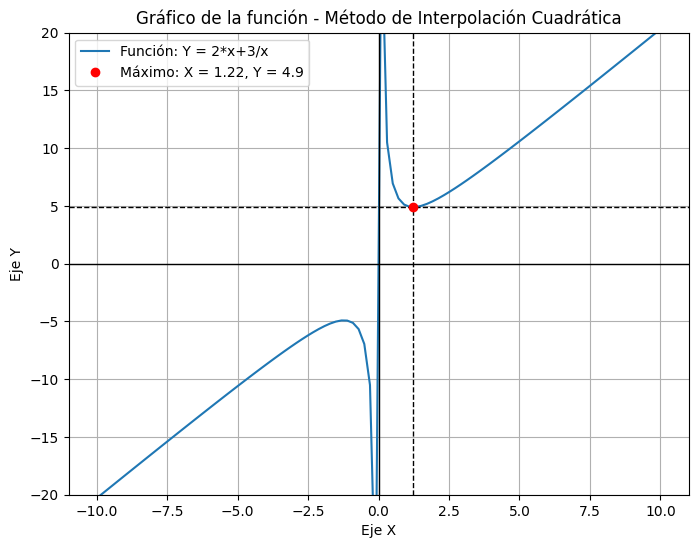

In [48]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto medio 'b': "))
c = float(input("Ingresa el valor del punto final 'c' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*x+3/x"
a=-1
b=0.5
c=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = interpolacion_cuadratica(a, b, c, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)

----------DATOS RECOPILADOS--------------


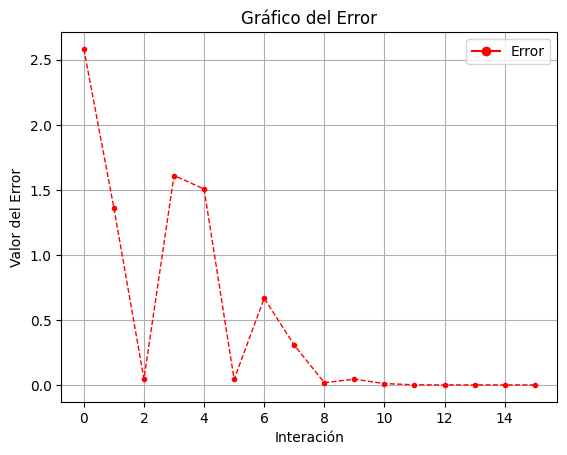

,Iteración,a,b,c,Punto medio,f(a),f(b),f(c),f(Punto medio),Error
0,1,-1.000000,0.500000,5.000000,3.083333,-5.000000,7.000000,10.600000,7.139640,2.583333e+00
1,2,0.500000,3.083333,5.000000,1.722222,7.000000,7.139640,10.600000,5.186380,1.361111e+00
2,3,0.500000,1.722222,3.083333,1.767747,7.000000,5.186380,7.139640,5.232569,4.552469e-02
3,4,1.722222,1.767747,3.083333,0.157630,5.186380,5.232569,7.139640,19.347161,1.610117e+00
4,5,1.722222,0.157630,1.767747,1.663834,5.186380,19.347161,5.232569,5.130732,1.506204e+00
...,...,...,...,...,...,...,...,...,...,...
11,12,1.260365,1.223636,1.233905,1.224632,4.900993,4.898981,4.899115,4.898980,9.959396e-04
12,13,1.260365,1.224632,1.223636,1.224763,4.900993,4.898980,4.898981,4.898979,1.305229e-04
13,14,1.260365,1.224763,1.224632,1.224746,4.900993,4.898979,4.898980,4.898979,1.632750e-05
14,15,1.260365,1.224746,1.224763,1.224745,4.900993,4.898979,4.898979,4.898979,1.660493e-06


In [49]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Búsqueda de la Sección Dorada



--------------MÍNIMO ENCONTRADO--------------
 1.224743803431785
Con punto inicial  -1
Con punto final  5


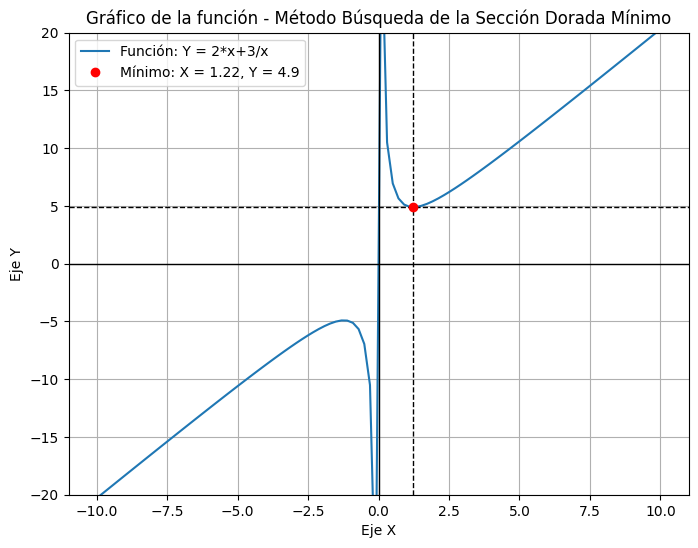

In [ ]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*x+3/x"
a=-1
b=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = minimo_seccion_dorada(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


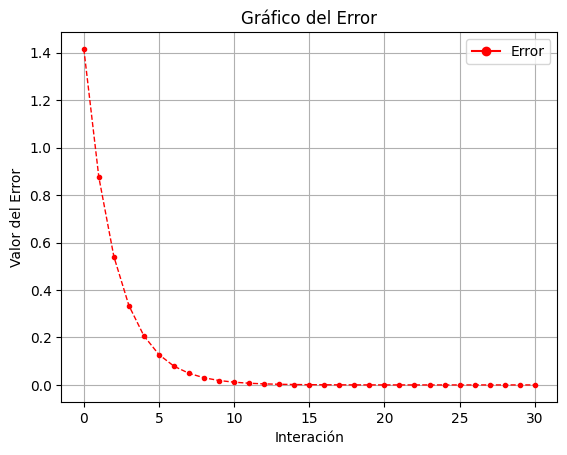

,Iteración,a,b,d,X1,X2,f(X1),f(X2),Error
0,1,-1.000000,5.000000,3.708000,2.708000,1.292000,6.523829,4.905981,1.416000e+00
1,2,-1.000000,2.708000,2.291544,1.291544,0.416456,4.905889,8.036554,8.750880e-01
2,3,0.416456,2.708000,1.416174,1.832630,1.291826,5.302252,4.905946,5.408044e-01
3,4,0.416456,1.832630,0.875196,1.291652,0.957435,4.905911,5.048243,3.342171e-01
4,5,0.957435,1.832630,0.540871,1.498305,1.291759,4.998873,4.905933,2.065462e-01
...,...,...,...,...,...,...,...,...,...
26,27,1.224735,1.224757,0.000014,1.224749,1.224744,4.898979,4.898979,5.209111e-06
27,28,1.224735,1.224749,0.000008,1.224744,1.224741,4.898979,4.898979,3.219231e-06
28,29,1.224741,1.224749,0.000005,1.224746,1.224744,4.898979,4.898979,1.989484e-06
29,30,1.224744,1.224749,0.000003,1.224747,1.224746,4.898979,4.898979,1.229501e-06


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Newton Rapson



--------------MAX-MIN ENCONTRADO--------------
 -1.2247439004905405
Con punto inicial  -1


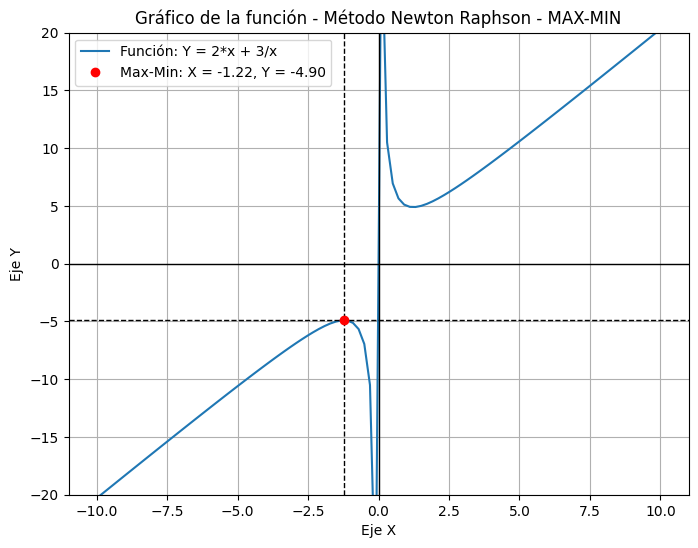

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*x+3/x"
a=-1


error = 1e-6
num_iteraciones = 100

try:

  resultados = Newton_Raphson_max_min(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


----------DATOS RECOPILADOS--------------


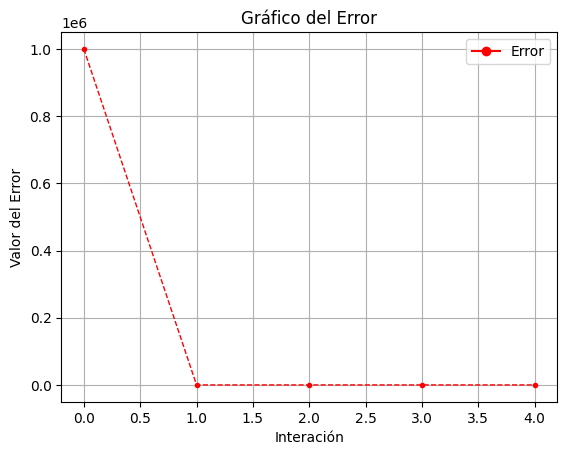

,Iteración,x,f(x),'f(x),''f(x),Error
0,1.0,-1.000000,-5.00000,-1.00000,-6.00000,1000000.000000
1,2.0,-1.166667,-4.90476,-0.20408,-3.77843,0.044247
2,3.0,-1.220679,-4.89901,-0.01335,-3.29873,0.003304
3,4.0,-1.224726,-4.89898,-0.00006,-3.26614,0.000015
4,5.0,-1.224744,-4.89898,-0.00000,-3.26599,0.000000


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados

